In [1]:
%load_ext version_information
%version_information 

Software versions
Python 3.5.3 64bit [GCC 6.3.0 20170406]
IPython 6.2.0
OS Linux 4.10.0 35 generic x86_64 with Ubuntu 17.04 zesty
Wed Sep 27 00:34:14 2017 CEST

### Load Python modules

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import *    
import numpy as np
import pandas as pd
from pathlib import Path
import os

### Print current working directory and set matplotlib plotting style
of http://fivethirtyeight.com/

In [3]:
#my_path = os.path.abspath('__file__') 
#print(os.chdir('..'))
print(os.getcwd())
plt.style.use('fivethirtyeight') # https://www.dataquest.io/blog/making-538-plots/
rcParams.update({'figure.autolayout': True})

/home/jm/Documents/master_thesis_git_repo/code_data/analysing_data/Python


### Download data of Prague from Czech Statistical Office

Can be used:

https://www.czso.cz/csu/xa/casove_rady_ekonomika__time_series_economy

https://www.czso.cz/csu/xa/casova-rada-dlouhodoby-vyvoj-kraje-ve-vybranych-ukazatelich

However, ultimately used from Excel file located @
https://www.czso.cz/csu/xa/casove-rady-za-hlavni-mesto-prahu

Input them manully because of avoiding additionaly complexity reading Excel files: https://bitbucket.org/openpyxl/openpyxl/overview

Only yearly avarage data are used.

In [4]:
Dwellings_started = np.array([5153,3331,5229,5702,6937,8124,7901,7886,6810,5719,2878,2733,2827,3352,4481,5227,2758])
Dwellings_completed = np.array([3593,3210,3950 ,4415, 5924, 6564, 5186, 9422, 6328, 7397, 6151, 3480, 4024, 3844, 4848, 5211,6092])
Building_permits_granted = np.array([14169, 14153 ,12991 ,13701 ,13106 ,11785, 11365, 10148 ,9306, 8538, 8188 ,7658 ,7147 ,5530 ,5273, 5211 ,5147])
year = list(range(2000,2017))
print(year)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


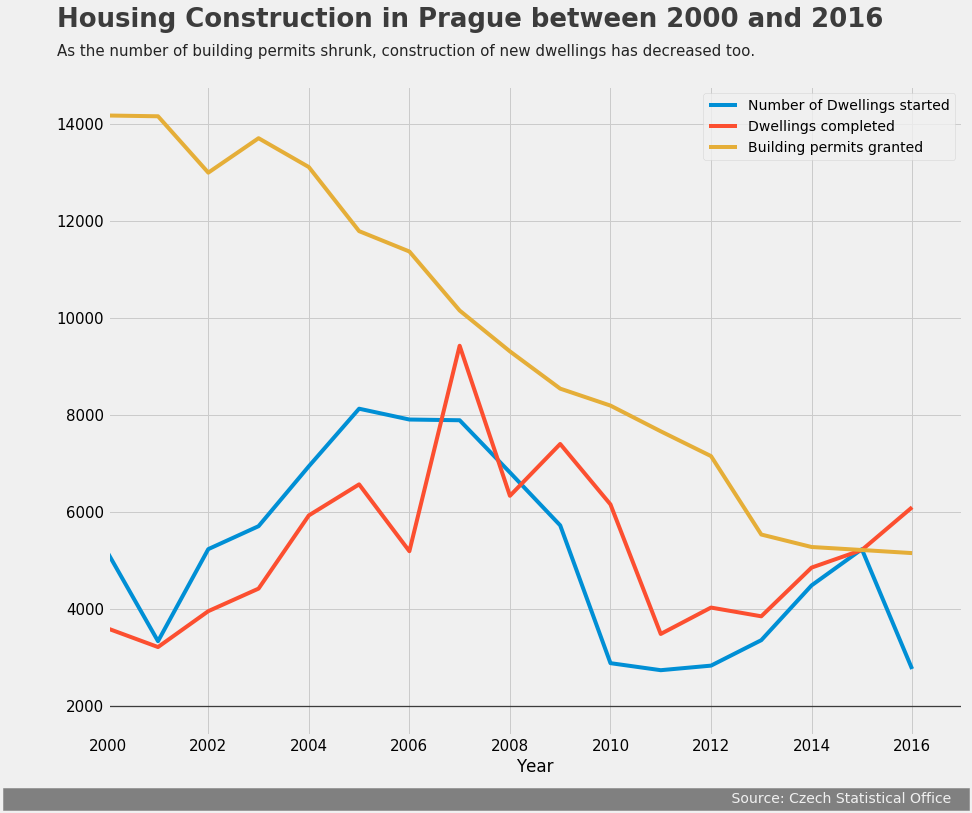

In [4]:
fig, ax = plt.subplots(figsize=(13,10))
ax.plot(year, Dwellings_started, label='Number of Dwellings started')
ax.plot(year, Dwellings_completed, label = 'Dwellings completed')
ax.plot(year, Building_permits_granted, label = 'Building permits granted')
ax.legend(loc='upper right')
ax.set_xlabel('Year')
ax.tick_params(axis = 'both', which = 'both', labelsize = 15)
ax.axhline(y = 2000, color = 'black', linewidth = 1.3, alpha = .7)
ax.set_xlim(left = 2000, right = 2017)
#ax.set_ylim([2000,15000])
#ax.set_ylim(bottom=3000, top = 15000)
#ax.xaxis.label.set_visible(False)
ax.text(x = 1998, y = -1, s = '                                                                                                                                                                 Source: Czech Statistical Office   ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
ax.text(x = 1999, y = 16000, s = "Housing Construction in Prague between 2000 and 2016",fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = 1999, y = 15400, s = 'As the number of building permits shrunk, construction of new dwellings has decreased too.',fontsize = 15, alpha = .85)
os.chdir('../../..') # <------ change/comment this (out) if executed several times, otherwise restart kernel & execute
pp = PdfPages('tex_thesis/images/constructionPRG.pdf')
pp.savefig(fig, bbox_inches='tight')
pp.close()
#fig.savefig("/tex_thesis/images/constructionPRG.png", bbox_inches='tight') # if png desired